In [1]:
import sys
print(f"Python interpreter path: {sys.executable}")
import numpy as np
print(f"NumPy version: {np.__version__}")
import pandas as pd
print(f"Pandas version: {pd.__version__}")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime


Python interpreter path: c:\Users\bader\anaconda3\python.exe
NumPy version: 1.26.4
Pandas version: 2.2.2


#.venv is my py environment, or a dedicated space for this 
# project's python packages
# this is an isolated environment, so youll need to install
# your specific modules (like a node modules)
# venv is created when you open a python file or create a ipynb file

# start with .venv/Scripts/activate so your commands
# point to this folder/environment
# whatever you need to install use py -m; pip can be used
# py is the windows python launcher, -m means run as script

Data Visualization

In [2]:
# Load datasets
unemployment = pd.read_csv("UNRATE.csv")
ai_postings = pd.read_csv("AI_Job_Postings.csv")
ai_projects = pd.read_csv("Public AI projects worldwide over time.csv")

datasets = {
    "Unemployment": unemployment,
    "AI Job Postings": ai_postings,
    "AI Projects": ai_projects,
}

for name, df in datasets.items():
    print(f"\n\n{'='*50}")
    print(f"{name} Dataset Exploring")
    print(f"{'='*50}")
    
    print(f"\nShape: {df.shape}")
    print(f"\nData types:")
    print(df.dtypes)
    
    print(f"\nMissing values:")
    print(df.isna().sum())
    
    print(f"\nStat summary")
    print(df.describe())

    print(f"\nFirst few rows or sample data:")
    print(df.head())






Unemployment Dataset Exploring

Shape: (123, 2)

Data types:
observation_date     object
UNRATE              float64
dtype: object

Missing values:
observation_date    0
UNRATE              0
dtype: int64

Stat summary
           UNRATE
count  123.000000
mean     4.669919
std      1.713540
min      3.400000
25%      3.700000
50%      4.100000
75%      5.000000
max     14.800000

First few rows or sample data:
  observation_date  UNRATE
0       2015-01-01     5.7
1       2015-02-01     5.5
2       2015-03-01     5.4
3       2015-04-01     5.4
4       2015-05-01     5.6


AI Job Postings Dataset Exploring

Shape: (121, 3)

Data types:
Year                                        int64
AI job postings (% of all job postings)    object
Geographic area                            object
dtype: object

Missing values:
Year                                        0
AI job postings (% of all job postings)    49
Geographic area                             0
dtype: int64

Stat summary
           

Data Cleaning and Manipulation

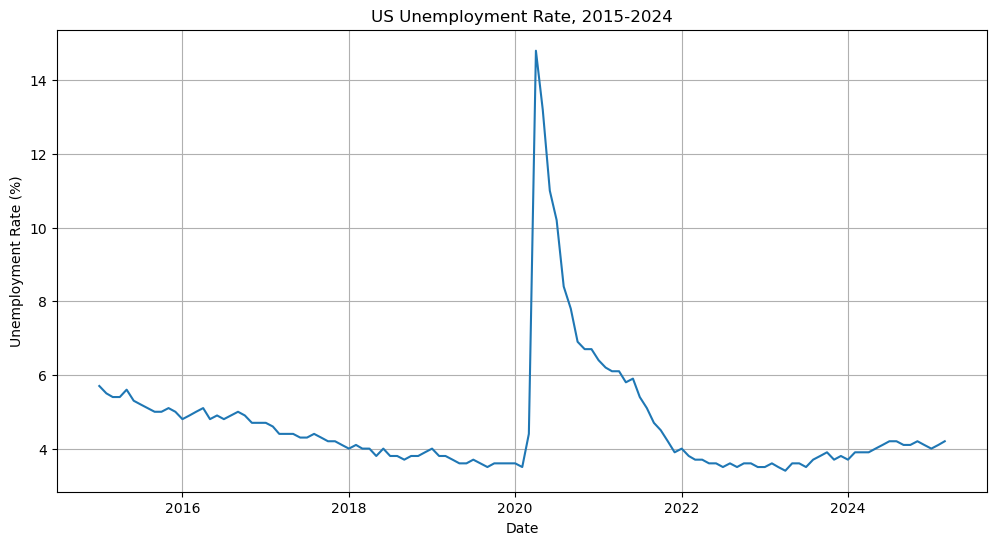

In [3]:
# Now visualize it

plt.figure(figsize=(12,6))
unemployment['observation_date'] = pd.to_datetime(unemployment['observation_date'])

plt.plot(unemployment['observation_date'], unemployment['UNRATE'])

plt.title("US Unemployment Rate, 2015-2024")

plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")

plt.grid(True)

plt.show()


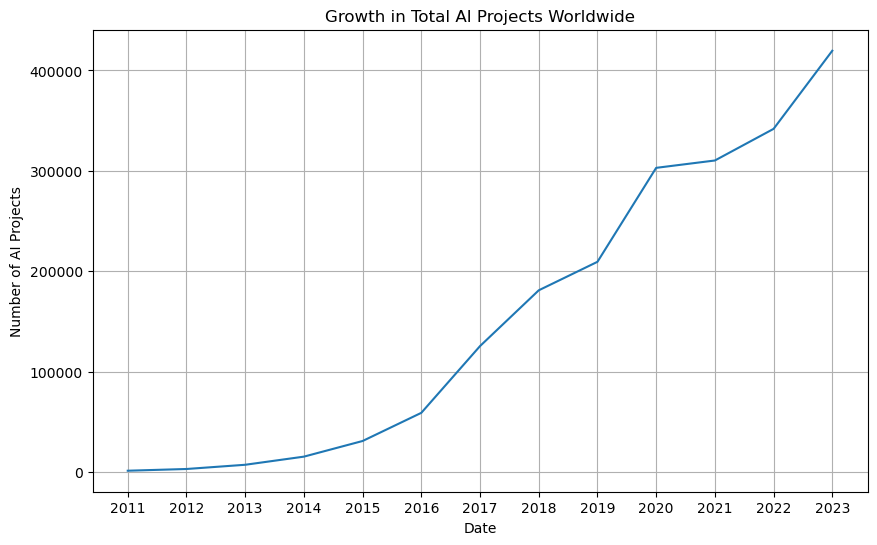

In [4]:
# Create an explicit copy
total_projects = ai_projects[ai_projects['Data_volume'] == 'Total AI projects'].copy()
total_projects['Date'] = total_projects['Date'].astype(str)
total_projects['Year'] = pd.to_datetime(total_projects['Date'], format='%Y')

plt.figure(figsize=(10,6))
plt.plot(total_projects['Date'], total_projects['# AI Projects'])

plt.title("Growth in Total AI Projects Worldwide")

plt.xlabel("Date")
plt.ylabel("Number of AI Projects")
plt.grid(True)

plt.show()

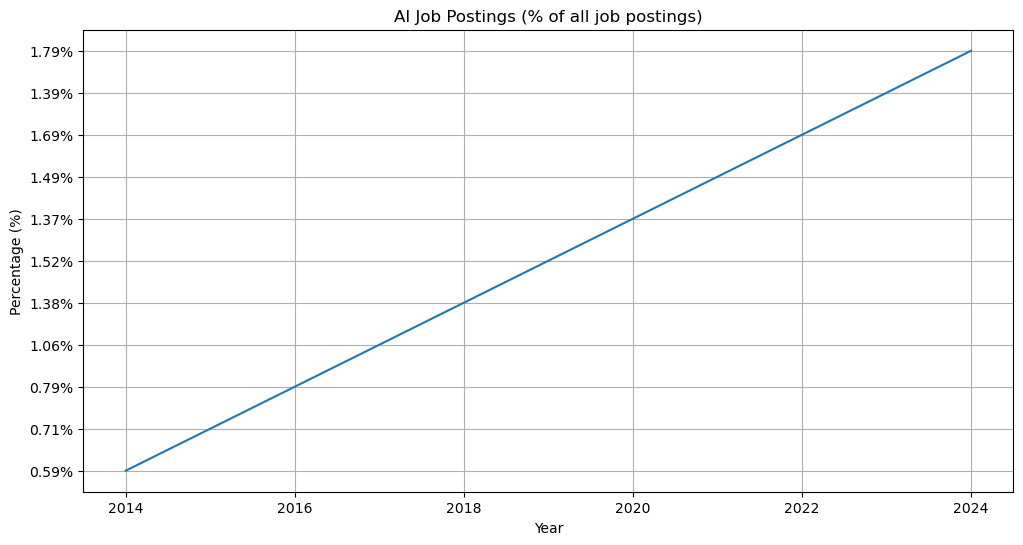

In [5]:
#AI Job Postings
us_jobs = ai_postings[ai_postings["Geographic area"] == 'United States']
plt.figure(figsize=(12,6))
plt.plot(us_jobs['Year'], us_jobs['AI job postings (% of all job postings)'])

plt.title("AI Job Postings (% of all job postings)")

plt.xlabel("Year")
plt.ylabel("Percentage (%)")

plt.grid(True)

plt.show()

In [6]:
# Handle missing values for all 3 datasets
print(ai_postings.isna().sum())


countries_with_data = ai_postings.groupby('Geographic area')['AI job postings (% of all job postings)'].count().sort_values(ascending=False)
print(countries_with_data)

ai_postings['Year'] = pd.to_datetime(ai_postings['Year'], format='%Y')

us_ai_postings = ai_postings[ai_postings['Geographic area'] == 'United States']


Year                                        0
AI job postings (% of all job postings)    49
Geographic area                             0
dtype: int64
Geographic area
Canada                  11
United Kingdom          11
United States           11
Belgium                  6
Netherlands              6
Sweden                   6
Switzerland              6
Singapore                5
United Arab Emirates     4
Hong Kong                3
Luxembourg               3
Name: AI job postings (% of all job postings), dtype: int64


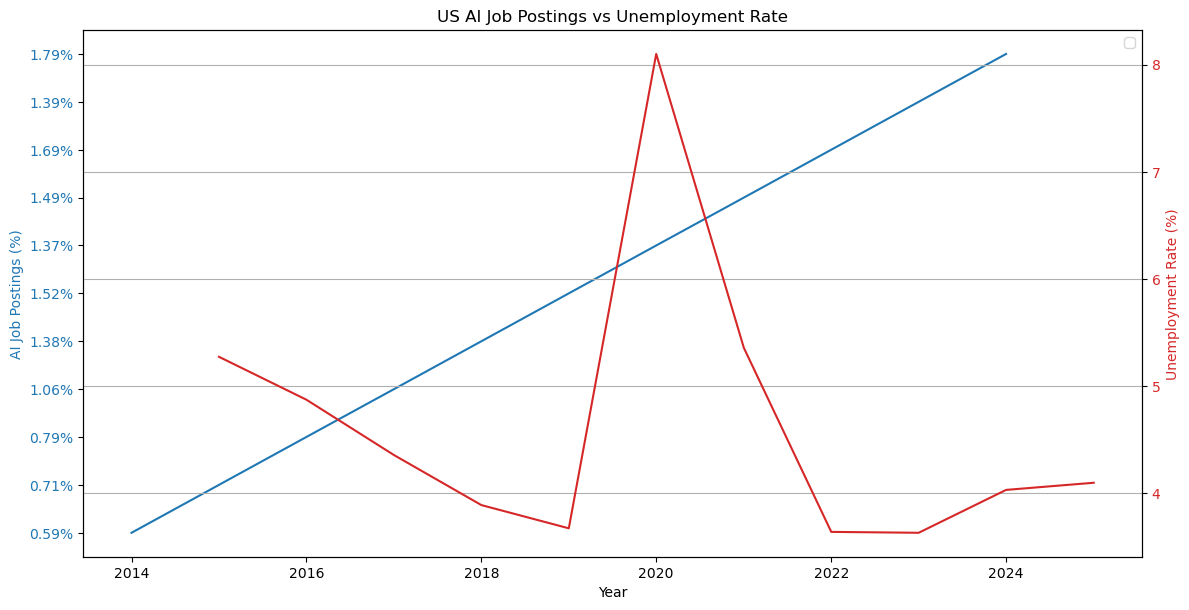

In [7]:
# Convert your unemployment data to yearly format to match with AI postings
unemployment['Year'] = pd.to_datetime(unemployment['observation_date']).dt.year
yearly_unemployment = unemployment.groupby('Year')['UNRATE'].mean().reset_index()

# Convert Year to datetime to match your ai_postings_zero format
yearly_unemployment['Year'] = pd.to_datetime(yearly_unemployment['Year'], format='%Y')

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot AI job postings on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('AI Job Postings (%)', color=color)
ax1.plot(us_ai_postings['Year'], us_ai_postings['AI job postings (% of all job postings)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for unemployment rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate (%)', color=color)
ax2.plot(yearly_unemployment['Year'], yearly_unemployment['UNRATE'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
fig.tight_layout()
plt.title('US AI Job Postings vs Unemployment Rate')

# Create a manual legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['AI Job Postings (%)'] + ['Unemployment Rate (%)'], loc='best')

plt.grid(True)
plt.show()


In [8]:
# Now merge dataset
merged_data = pd.merge(
    us_ai_postings,
    yearly_unemployment,
    on='Year',
    how='inner'
)

print(merged_data.shape)
print(merged_data.head())

print(f"Years included in analysis:")
print(merged_data['Year'].dt.year.sort_values().unique())


(10, 4)
        Year AI job postings (% of all job postings) Geographic area    UNRATE
0 2015-01-01                                   0.71%   United States  5.275000
1 2016-01-01                                   0.79%   United States  4.875000
2 2017-01-01                                   1.06%   United States  4.358333
3 2018-01-01                                   1.38%   United States  3.891667
4 2019-01-01                                   1.52%   United States  3.675000
Years included in analysis:
[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [9]:
# Merge AI projects
full_merged_data = pd.merge(
    merged_data,
    total_projects[['Year', '# AI Projects']],
    on='Year',
    how='inner'
)

print(full_merged_data.head())

        Year AI job postings (% of all job postings) Geographic area  \
0 2015-01-01                                   0.71%   United States   
1 2016-01-01                                   0.79%   United States   
2 2017-01-01                                   1.06%   United States   
3 2018-01-01                                   1.38%   United States   
4 2019-01-01                                   1.52%   United States   

     UNRATE  # AI Projects  
0  5.275000        31049.0  
1  4.875000        59093.0  
2  4.358333       125541.0  
3  3.891667       181062.0  
4  3.675000       209433.0  


In [10]:
# print(full_merged_data.isna().sum())
# print(full_merged_data.dtypes)
# print(full_merged_data['Year'].dt.year.sort_values().unique())
# print(full_merged_data.columns.tolist())

print(full_merged_data[['AI job postings (% of all job postings)', 'UNRATE', '# AI Projects']].describe())
print(full_merged_data['Year'].dt.year.sort_values().unique())
print("\nData sorted by year:")
print(full_merged_data[['Year', 'AI job postings (% of all job postings)', 'UNRATE', '# AI Projects']].head())

         UNRATE  # AI Projects
count  9.000000       9.000000
mean   4.756481  220092.549428
std    1.431981  133159.028493
min    3.633333   31049.000000
25%    3.675000  125541.000000
50%    4.358333  209433.000000
75%    5.275000  310301.000000
max    8.100000  419584.944853
[2015 2016 2017 2018 2019 2020 2021 2022 2023]

Data sorted by year:
        Year AI job postings (% of all job postings)    UNRATE  # AI Projects
0 2015-01-01                                   0.71%  5.275000        31049.0
1 2016-01-01                                   0.79%  4.875000        59093.0
2 2017-01-01                                   1.06%  4.358333       125541.0
3 2018-01-01                                   1.38%  3.891667       181062.0
4 2019-01-01                                   1.52%  3.675000       209433.0


In [11]:
# finally remove %
full_merged_data['AI job postings (% of all job postings)'] = full_merged_data['AI job postings (% of all job postings)'].astype(str)
full_merged_data['AI job postings (% of all job postings)'] = pd.to_numeric(
    full_merged_data['AI job postings (% of all job postings)'].str.replace('%', ''), 
    errors='coerce'
)

print(full_merged_data['AI job postings (% of all job postings)'])

# and create a year lag for AI metrics
full_merged_data['AI_Projects_Lag1'] = full_merged_data['# AI Projects'].shift(1)
full_merged_data['AI_Job_Postings_Lag1'] = full_merged_data['AI job postings (% of all job postings)'].shift(1)

# find percent change year over year
full_merged_data['UNRATE_YoY_Change'] = full_merged_data['UNRATE'].pct_change() * 100
full_merged_data['AI_Projects_YoY_Change'] = full_merged_data['# AI Projects'].pct_change() * 100
full_merged_data['AI_Jobs_YoY_Change'] = pd.to_numeric(full_merged_data['AI job postings (% of all job postings)'], errors='coerce').pct_change() * 100

# this did not end up being used

0    0.71
1    0.79
2    1.06
3    1.38
4    1.52
5    1.37
6    1.49
7    1.69
8    1.39
Name: AI job postings (% of all job postings), dtype: float64


In [12]:
# Single variable descriptive stats
print("===== SINGLE VARIABLE DESCRIPTIVE STATS ====\n")

# AI Job Postings
print("1. AI Job Postings (% of all job postings)")
print("-" * 45)
ai_postings = full_merged_data['AI job postings (% of all job postings)']
print(f"Mean: {ai_postings.mean():.4f}")
print(f"Median: {ai_postings.median():.4f}")
print(f"Mode: {ai_postings.mode().values[0]}")
print(f"Standard Deviation: {ai_postings.std():.4f}")
print(f"Variance: {ai_postings.var():.4f}")
print(f"Min: {ai_postings.min():.4f}")
print(f"Max: {ai_postings.max():.4f}")
print("\n")


# For Unemployment Rate (UNRATE)
print("2. Unemployment Rate (UNRATE)")
print("-" * 30)
unrate = full_merged_data['UNRATE']
print(f"Mean: {unrate.mean():.4f}")
print(f"Median: {unrate.median():.4f}")
print(f"Mode: {unrate.mode().values[0]:.4f}")
print(f"Standard Deviation: {unrate.std():.4f}")
print(f"Variance: {unrate.var():.4f}")
print(f"Min: {unrate.min():.4f}")
print(f"Max: {unrate.max():.4f}")
print("\n")


print("3. Number of AI Projects")
print("-" * 25)
ai_projects = full_merged_data['# AI Projects']
print(f"Mean: {ai_projects.mean():.4f}")
print(f"Median: {ai_projects.median():.4f}")
print(f"Mode: {ai_projects.mode().values[0]:.4f}")
print(f"Standard Deviation: {ai_projects.std():.4f}")
print(f"Variance: {ai_projects.var():.4f}")
print(f"Min: {ai_projects.min():.4f}")
print(f"Max: {ai_projects.max():.4f}")

===== SINGLE VARIABLE DESCRIPTIVE STATS ====

1. AI Job Postings (% of all job postings)
---------------------------------------------
Mean: 1.2667
Median: 1.3800
Mode: 0.71
Standard Deviation: 0.3376
Variance: 0.1140
Min: 0.7100
Max: 1.6900


2. Unemployment Rate (UNRATE)
------------------------------
Mean: 4.7565
Median: 4.3583
Mode: 3.6333
Standard Deviation: 1.4320
Variance: 2.0506
Min: 3.6333
Max: 8.1000


3. Number of AI Projects
-------------------------
Mean: 220092.5494
Median: 209433.0000
Mode: 31049.0000
Standard Deviation: 133159.0285
Variance: 17731326869.1727
Min: 31049.0000
Max: 419584.9449


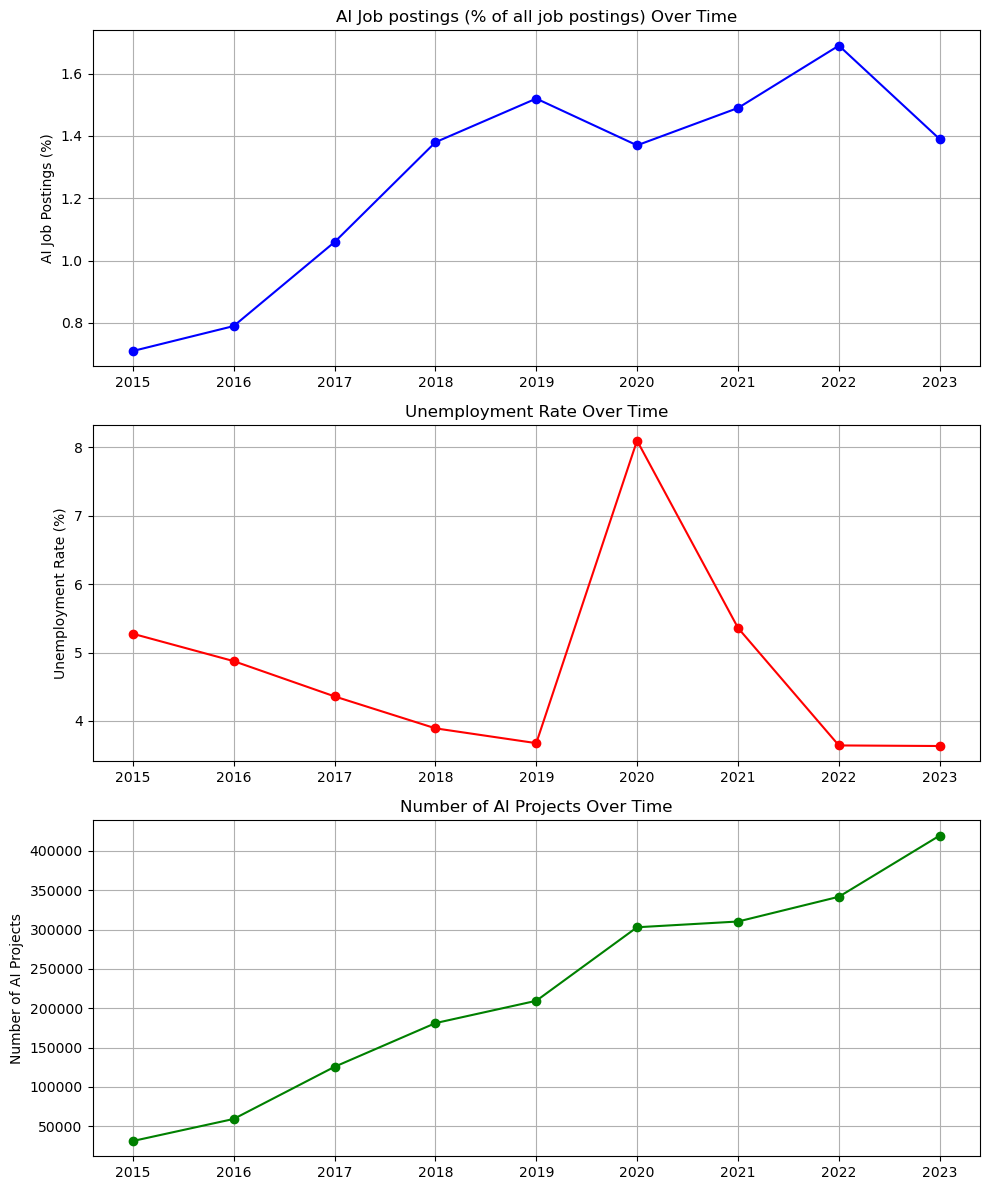

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,12))

sorted_data = full_merged_data.sort_values('Year')

ax1.plot(sorted_data['Year'], 
         sorted_data['AI job postings (% of all job postings)'],
            marker ='o', linestyle='-',
            color='blue')
ax1.set_ylabel('AI Job Postings (%)')
ax1.set_title('AI Job postings (% of all job postings) Over Time')
ax1.grid(True)

ax2.plot(sorted_data['Year'], sorted_data['UNRATE'], 
         marker='o', linestyle='-', color='red')
ax2.set_ylabel('Unemployment Rate (%)')
ax2.set_title('Unemployment Rate Over Time')
ax2.grid(True)

ax3.plot(sorted_data['Year'], sorted_data['# AI Projects'], 
         marker='o', linestyle='-', color='green')
ax3.set_ylabel('Number of AI Projects')
ax3.set_title('Number of AI Projects Over Time')
ax3.grid(True)

for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

plt.show()


==== CORRELATION ANALYSIS ====

                                         AI job postings (% of all job postings)  \
AI job postings (% of all job postings)                                 1.000000   
UNRATE                                                                 -0.197902   
# AI Projects                                                           0.832027   

                                           UNRATE  # AI Projects  
AI job postings (% of all job postings) -0.197902       0.832027  
UNRATE                                   1.000000      -0.040962  
# AI Projects                           -0.040962       1.000000  


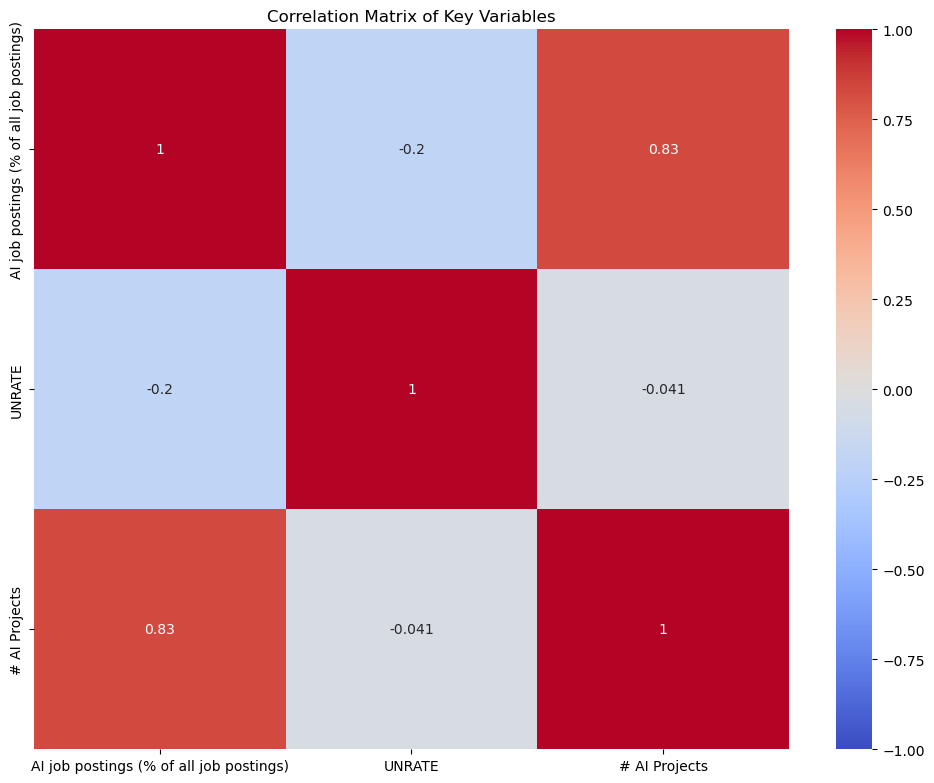

In [14]:
# Correlation
correlation_matrix = full_merged_data[['AI job postings (% of all job postings)', 
                                      'UNRATE', '# AI Projects']].corr()
print("\n==== CORRELATION ANALYSIS ====\n")
print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

In [15]:
# Test my hypothesis
import scipy.stats as stats

ai_postings = full_merged_data['AI job postings (% of all job postings)']
unrate = full_merged_data['UNRATE']
ai_projects = full_merged_data['# AI Projects']

print("\n==== HYPOTHESIS TESTING ====\n")

# Is correlation between AI job postings & AI projects significant?
r_postings_projects, p_postings_projects = stats.pearsonr(ai_postings, ai_projects)

print(f"H0: There is no significant correlation between AI job postings and AI projects")
print(f"Correlation coefficient: {r_postings_projects:.4f}")
print(f"P-value: {p_postings_projects:.4f}")
print(f"Result: {'Reject H0' if p_postings_projects < 0.05 else 'Fail to reject H0'}")
print()

# Is correlation betweeen UE and AI job postings significant?
r_unrate_postings, p_unrate_postings = stats.pearsonr(unrate, ai_postings)
print(f"H0: There is no significant correlation between unemployment rate and AI job postings")
print(f"Correlation coefficient: {r_unrate_postings:.4f}")
print(f"P-value: {p_unrate_postings:.4f}")
print(f"Result: {'Reject H0' if p_unrate_postings < 0.05 else 'Fail to reject H0'}")
print()

# Is correelation between UE and AI projects significant?
r_unrate_projects, p_unrate_projects = stats.pearsonr(unrate, ai_projects)
print(f"H0: There is no significant correlation between unemployment rate and AI projects")
print(f"Correlation coefficient: {r_unrate_projects:.4f}")
print(f"P-value: {p_unrate_projects:.4f}")
print(f"Result: {'Reject H0' if p_unrate_projects < 0.05 else 'Fail to reject H0'}")


==== HYPOTHESIS TESTING ====

H0: There is no significant correlation between AI job postings and AI projects
Correlation coefficient: 0.8320
P-value: 0.0054
Result: Reject H0

H0: There is no significant correlation between unemployment rate and AI job postings
Correlation coefficient: -0.1979
P-value: 0.6098
Result: Fail to reject H0

H0: There is no significant correlation between unemployment rate and AI projects
Correlation coefficient: -0.0410
P-value: 0.9167
Result: Fail to reject H0


In [16]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predict UE rate
X = full_merged_data[['AI job postings (% of all job postings)', "# AI Projects"]]
# this tried to assign separate weights to each var

y = full_merged_data['UNRATE']

# training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

# create lin reg model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# Make prediction
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_metrics = {
    'R2': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': mean_squared_error(y_test, y_pred_lr, squared=False)
    }


print(f"Linear regression performace: {lr_metrics}")

# R2 is -0.29, MAE of 0.60, MSE of 0.80



Linear regression performace: {'R2': -0.2922508263575547, 'MAE': 0.603493215377042, 'RMSE': 0.70100946682534}


c:\Users\bader\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
# Conclusion?
# Based on available yearly data from 2015-2023 no statistically significant relationship was found between AI adoption metrics and UE rates
# At a macro level they may be other factors that have stronger influences on UE rates (tarrifs) than AI adoption during this period
# conclusion, null result

Coefficient: [2.10946276e-06]
R2 score: 0.6923


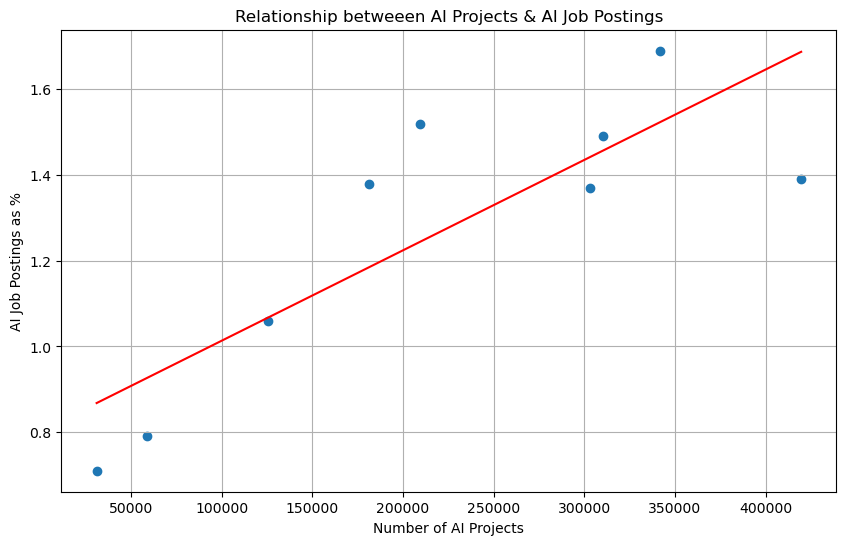

                R2       MAE
training  0.536838  0.161186
test      0.875908  0.125057


In [18]:
# so lets pivot to AI postings + projects
X = full_merged_data[['# AI Projects']].values.reshape(-1,1) # feature or IV
y = full_merged_data[['AI job postings (% of all job postings)']] # my target/ prediction/DV

# relationship between these 2
model = LinearRegression().fit(X, y)
print(f"Coefficient: {model.coef_[0]}") 
print(f"R2 score: {model.score(X, y):.4f}")

# visualized
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Relationship betweeen AI Projects & AI Job Postings")
plt.xlabel("Number of AI Projects")
plt.ylabel("AI Job Postings as %")
plt.grid(True)
plt.show()

# 69% of variance in AI job postings uses AI projects as a predictor
# coefficient: for each ai projects, % of ai jobpostings increases by (0.00000211)%

# simple metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 70% split is used for training, 30% used to evaluate model (random)  

# Model training
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# df
eval_df = pd.DataFrame({
    "R2": [r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)], #0-1
    "MAE": [mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)],
   }, index=['training', 'test'])

print(eval_df)

# Small sample size warning, values can change rapidly
# 69% of variance in AI job postings uses AI projects as a predictor
# coefficient: for each ai projects, % of ai jobpostings increases by (0.00000211)% 


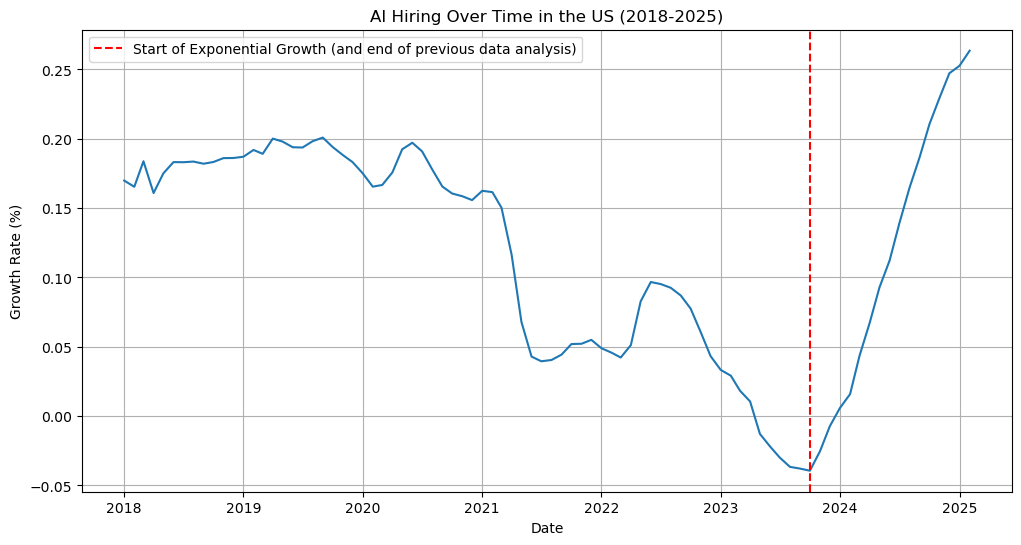

Average monthly growth rate since 2023: 7.78%


In [19]:
ai_hiring = pd.read_csv("AI_Hiring_Over_Time.csv")

ai_hiring['Date'] = pd.to_datetime(ai_hiring['Month of Month'], format='%B %Y')
ai_hiring = ai_hiring.sort_values("Date")

plt.figure(figsize=(12,6))
plt.plot(ai_hiring['Date'], ai_hiring['AI talent concentration pct'])
plt.title("AI Hiring Over Time in the US (2018-2025)")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.axvline(x=pd.to_datetime('2023-10-01'), color='r', linestyle='--', 
           label='Start of Exponential Growth (and end of previous data analysis)')
plt.legend()
plt.grid(True)
plt.show()

ai_hiring['Growth'] = ai_hiring['AI talent concentration pct'].pct_change() * 100
recent = ai_hiring[ai_hiring['Date'] >= '2023-10-01']
print(f"Average monthly growth rate since 2023: {recent['Growth'].mean():.2f}%")

In [20]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Range1d, LinearAxis, DatetimeTickFormatter
from bokeh.palettes import Spectral6
import pandas as pd

# Set output to an HTML file 
output_file("ai_unemployment_visualization.html")

# Create source
source = ColumnDataSource(data={
    'year': full_merged_data['Year'],
    'ai_projects': full_merged_data['# AI Projects']/1000,
    'unemployment': full_merged_data['UNRATE'],
    'ai_jobs': full_merged_data['AI job postings (% of all job postings)']*100
})

# Create figure with dual y-axes
p = figure(title="AI Growth vs. Unemployment: No Sign of Job Displacement",
           x_axis_label="Year", y_axis_label="AI Projects (Thousands)",
           x_axis_type="datetime", width=900, height=500)

# Add second y-axis for unemployment
p.extra_y_ranges = {"unemployment": Range1d(start=0, end=16)}
p.add_layout(LinearAxis(y_range_name="unemployment", axis_label="Unemployment Rate (%)"), "right")

# Plot AI projects (primary y-axis)
p.line('year', 'ai_projects', source=source,
       line_width=3, color=Spectral6[0], legend_label="AI Projects")

# Plot unemployment (secondary y-axis)
p.line('year', 'unemployment', source=source,
       line_width=3, color=Spectral6[1], y_range_name="unemployment", 
       legend_label="Unemployment Rate")

# Use scatter instead of circle 
p.scatter('year', 'ai_jobs', source=source,
        size=10, color=Spectral6[2], legend_label="AI Job Postings (%)")

# Add hover tool with proper formatters
hover = HoverTool(tooltips=[
    ("Year", "@year{%Y}"),
    ("AI Projects", "@ai_projects{0,0}k"),
    ("Unemployment", "@unemployment{0.0}%"),
    ("AI Job Postings", "@ai_jobs{0.00}%")
], formatters={'@year': 'datetime'})
p.add_tools(hover)

# Configure legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"  # Makes legend interactive

# Show the result
show(p)